In [2]:
import pandas as pd

diabetes_data = pd.read_csv('Diabetes.csv')
inactivity_data = pd.read_csv('Physical inactivity.csv')
healthcare_spending_data = pd.read_csv('GHED_data.csv', low_memory=False)

C:\Users\Jakob\AppData\Local\Temp\ipykernel_17808\2753505018.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
diabetes_data.replace('no data', pd.NA, inplace=True)
inactivity_data.replace('no data', pd.NA, inplace=True)
healthcare_spending_data.replace('no data', pd.NA, inplace=True)

print(diabetes_data.isnull(). sum())
print(inactivity_data.isnull(). sum())
print(healthcare_spending_data.isnull(). sum())

Indicator Name               0
Cancer Type               1812
Year                         0
Country Name                 9
Region                       0
Gender                       0
Area                      1812
Numeric                     78
Lower Confidence Limit    1218
Upper Confidence Limit    1218
Comment                   1812
Unnamed: 11               1812
dtype: int64
Indicator Name               0
Cancer Type               1029
Year                         0
Country Name                 6
Region                       0
Gender                       0
Area                      1029
Numeric                      3
Lower Confidence Limit       3
Upper Confidence Limit       3
Comment                   1029
Unnamed: 11               1029
dtype: int64
country                  0
code                     0
region                   0
income                   0
year                     0
                      ... 
hk_ext_usd2021_pc     3510
hk_pvtd_usd2021_pc    3911
gdp_usd2021_pc

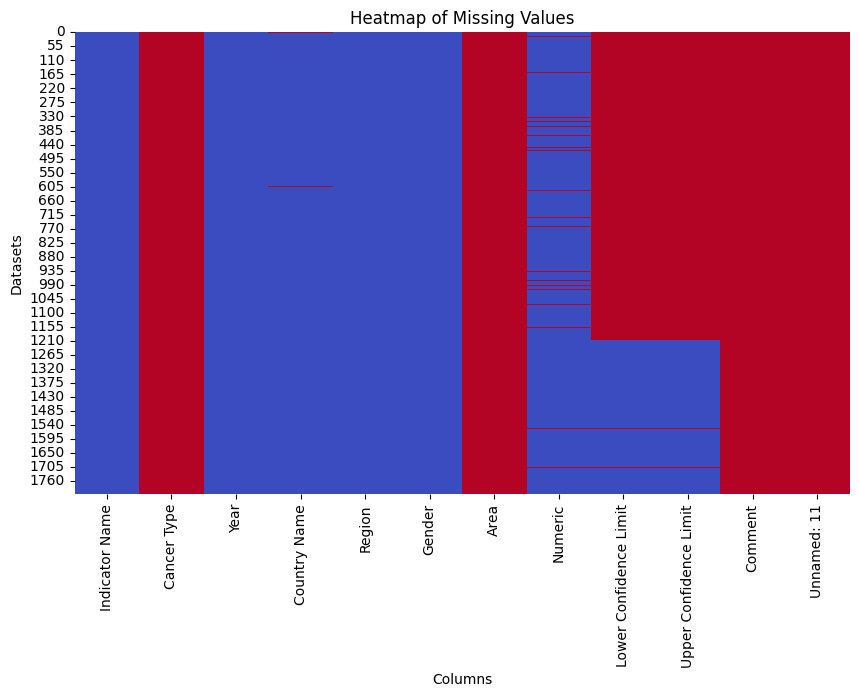

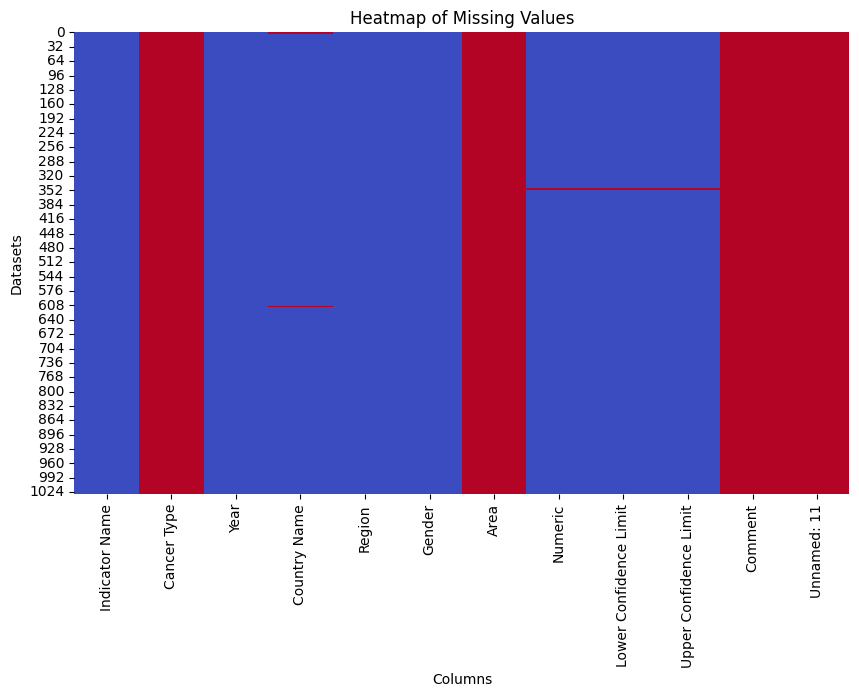

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a heatmap for missing values across datasets
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_data.isnull(), cmap='coolwarm', cbar=False)

plt.title('Heatmap of Missing Values')
plt.ylabel('Datasets')
plt.xlabel('Columns')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(inactivity_data.isnull(), cmap='coolwarm', cbar=False)

plt.title('Heatmap of Missing Values')
plt.ylabel('Datasets')
plt.xlabel('Columns')
plt.show()

# plt.figure(figsize=(10, 6))
# sns.heatmap(healthcare_spending_data.isnull(), cmap='coolwarm', cbar=False)

# plt.title('Heatmap of Missing Values')
# plt.ylabel('Datasets')
# plt.xlabel('Columns')
# plt.show()

C:\Users\Jakob\AppData\Local\Temp\ipykernel_17808\1217997268.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_spending_filtered.rename(columns={'country':'Country Name'}, inplace=True)


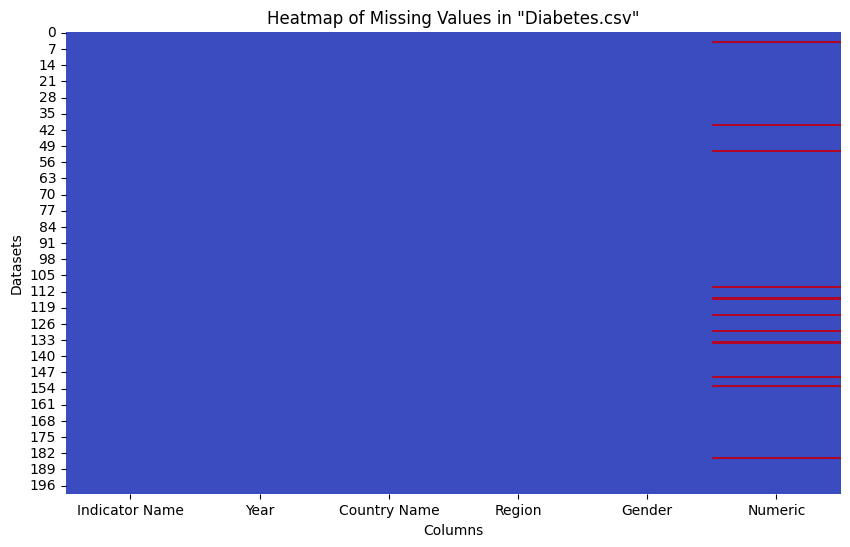

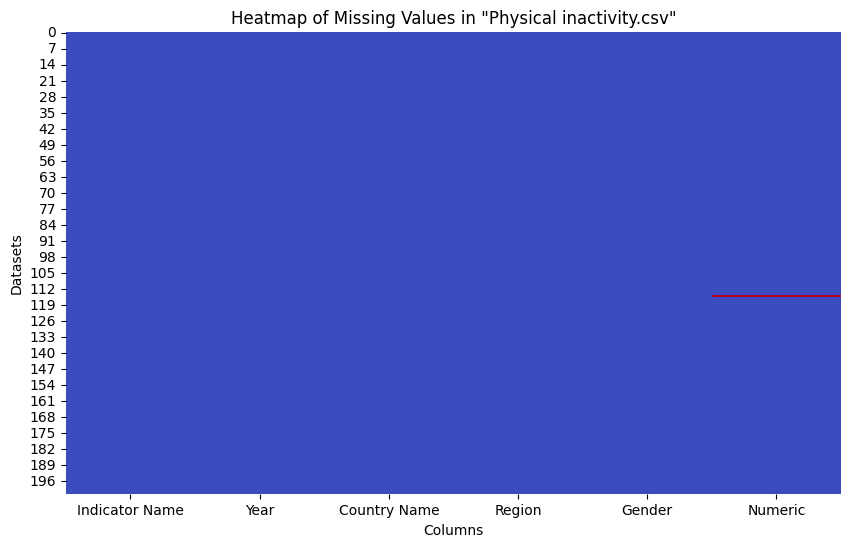

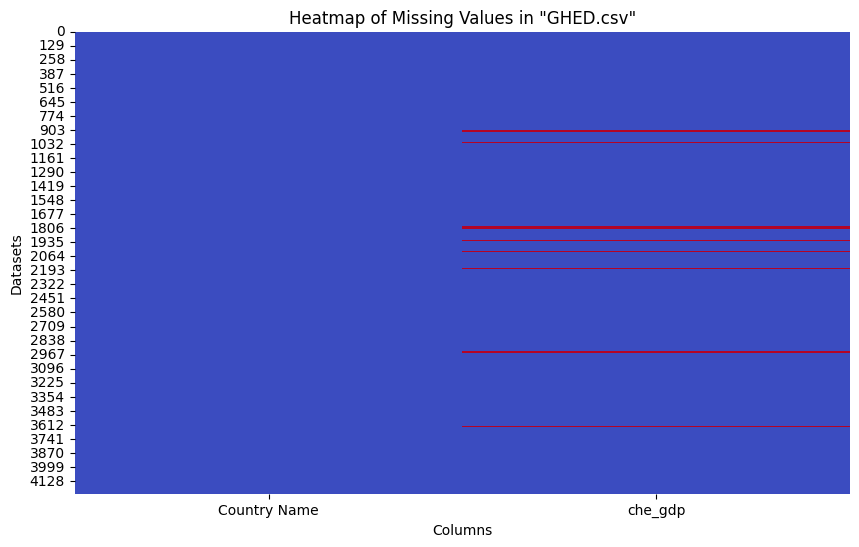

In [6]:
diabetes_data = pd.read_csv('Diabetes.csv')
inactivity_data = pd.read_csv('Physical inactivity.csv')
healthcare_spending_data = pd.read_csv('GHED_data.csv', low_memory=False)

diabetes_data.replace('no data', pd.NA, inplace=True)
inactivity_data.replace('no data', pd.NA, inplace=True)
healthcare_spending_data.replace('no data', pd.NA, inplace=True)

diabetes_data.dropna(axis=1, how='all', inplace=True)
diabetes_data.dropna(subset=['Country Name'], inplace=True)
diabetes_data.drop(['Lower Confidence Limit', 'Upper Confidence Limit'], axis=1, inplace=True)
diabetes_data = diabetes_data[diabetes_data['Gender'] == 'Total']
diabetes_data['Numeric'] = pd.to_numeric(diabetes_data['Numeric'], errors='coerce')
diabetes_filtered = diabetes_data[(diabetes_data['Indicator Name'] == 'Diabetes age-standardized death rate')].reset_index(drop=True)

inactivity_data.dropna(axis=1, how='all', inplace=True)
inactivity_data.dropna(subset=['Country Name'], inplace=True)
inactivity_data.drop(['Lower Confidence Limit', 'Upper Confidence Limit'], axis=1, inplace=True)
inactivity_data = inactivity_data[inactivity_data['Gender'] == 'Total']
inactivity_data['Numeric'] = pd.to_numeric(inactivity_data['Numeric'], errors='coerce')
inactivity_filtered = inactivity_data[(inactivity_data['Indicator Name'] == 'Physical inactivity, adults aged 18+')].reset_index(drop=True)

healthcare_spending_data.dropna(axis=1, how='all', inplace=True)
healthcare_spending_filtered = healthcare_spending_data[['country','che_gdp']]
healthcare_spending_data['che_gdp'] = pd.to_numeric(healthcare_spending_data['che_gdp'], errors='coerce')
healthcare_spending_filtered.rename(columns={'country':'Country Name'}, inplace=True)


plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_filtered.isnull(), cmap='coolwarm', cbar=False)

plt.title('Heatmap of Missing Values in "Diabetes.csv"')
plt.ylabel('Datasets')
plt.xlabel('Columns')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(inactivity_filtered.isnull(), cmap='coolwarm', cbar=False)

plt.title('Heatmap of Missing Values in "Physical inactivity.csv"')
plt.ylabel('Datasets')
plt.xlabel('Columns')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(healthcare_spending_filtered.isnull(), cmap='coolwarm', cbar=False)

plt.title('Heatmap of Missing Values in "GHED.csv"')
plt.ylabel('Datasets')
plt.xlabel('Columns')
plt.show()


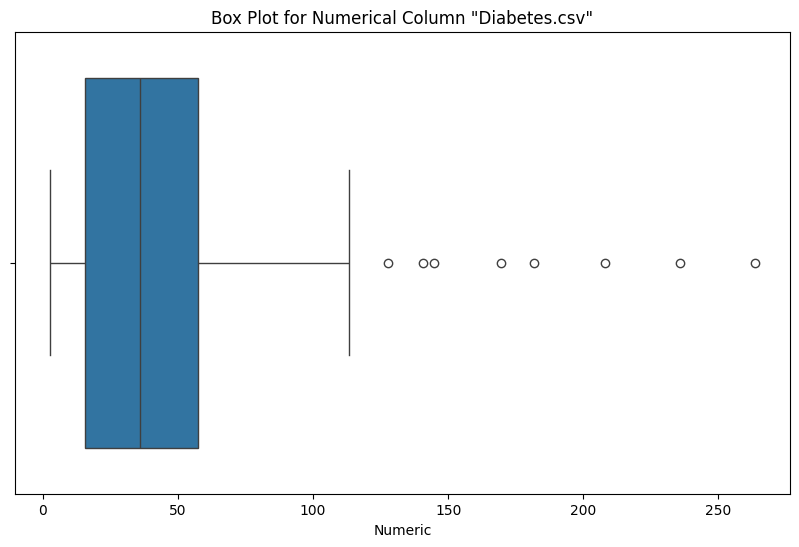

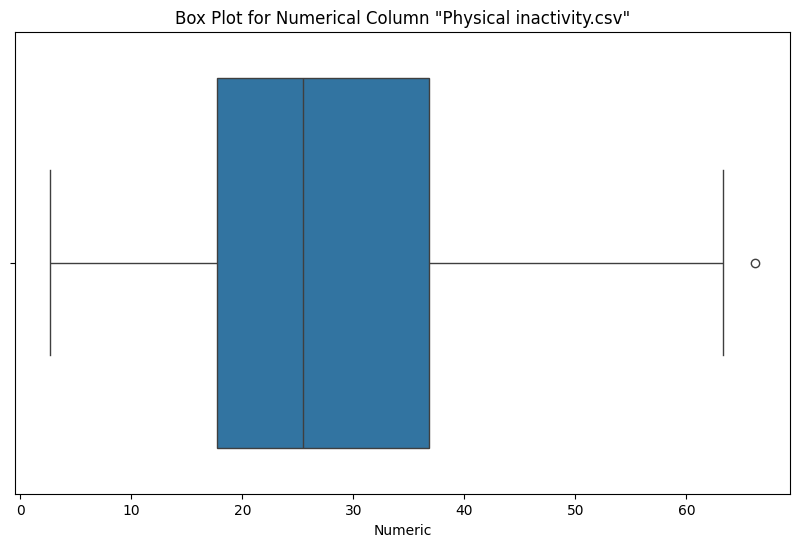

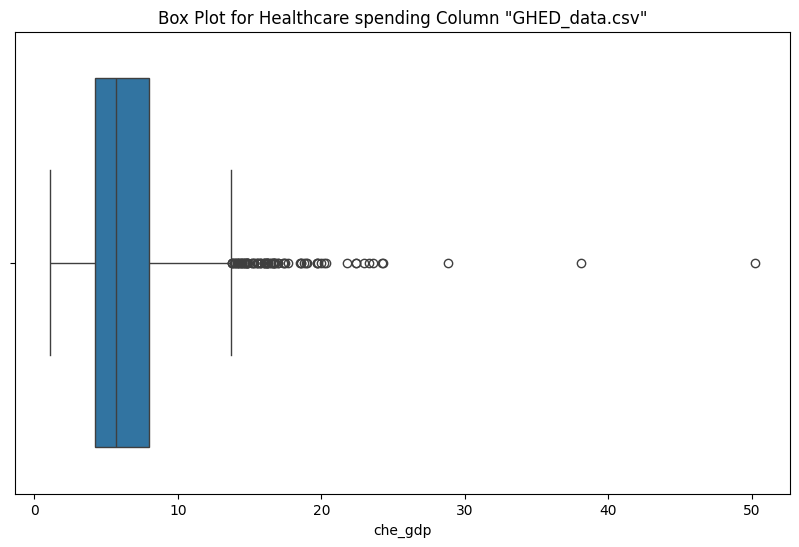

                           Indicator Name  Year  \
13   Diabetes age-standardized death rate  2019   
60   Diabetes age-standardized death rate  2019   
63   Diabetes age-standardized death rate  2019   
93   Diabetes age-standardized death rate  2019   
99   Diabetes age-standardized death rate  2019   
112  Diabetes age-standardized death rate  2019   
114  Diabetes age-standardized death rate  2019   
142  Diabetes age-standardized death rate  2019   

                         Country Name                        Region Gender  \
13                            Bahrain  Eastern Mediterranean Region  Total   
60                           Eswatini                African Region  Total   
63                               Fiji        Western Pacific Region  Total   
93                           Kiribati        Western Pacific Region  Total   
99                            Lesotho                African Region  Total   
112                         Mauritius                African Region  Tot

In [7]:
diabetes_clean = diabetes_filtered.dropna(how='any')
inactivity_clean = inactivity_filtered.dropna(how='any')
healthcare_spending_clean = healthcare_spending_filtered.dropna(how='any')

plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_clean, x='Numeric')  # Replace with your column name
plt.title('Box Plot for Numerical Column "Diabetes.csv"')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=inactivity_clean, x='Numeric')  # Replace with your column name
plt.title('Box Plot for Numerical Column "Physical inactivity.csv"')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=healthcare_spending_clean, x='che_gdp')  # Replace with your column name
plt.title('Box Plot for Healthcare spending Column "GHED_data.csv"')
plt.show()



# IQR Method to identify outliers
Q1 = diabetes_clean['Numeric'].quantile(0.25)  # Replace with your column name
Q3 = diabetes_clean['Numeric'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers = diabetes_clean[(diabetes_clean['Numeric'] < lower_bound) | (diabetes_clean['Numeric'] > upper_bound)]

# Print outliers
print(outliers)

# IQR Method to identify outliers
Q1 = inactivity_data['Numeric'].quantile(0.25)  # Replace with your column name
Q3 = inactivity_data['Numeric'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers_i = inactivity_clean[(inactivity_clean['Numeric'] < lower_bound) | (inactivity_clean['Numeric'] > upper_bound)]

# Print outliers
# print(outliers_i)

# IQR Method to identify outliers
Q1 = healthcare_spending_clean['che_gdp'].quantile(0.25)  # Replace with your column name
Q3 = healthcare_spending_clean['che_gdp'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers_h = healthcare_spending_clean[(healthcare_spending_clean['che_gdp'] < lower_bound) | (healthcare_spending_clean['che_gdp'] > upper_bound)]

# Print outliers
# print(outliers_h)
